<a href="https://colab.research.google.com/github/tansugi/G14-GBP-CHF-XAI-Prediction/blob/main/G14_GBP_CHF_Prediction_Using_Tree_Based_Models_An_Explainable_AI_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.0 Import Libraries & Dataset**

**1.1 Import Libraries**

In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import shap
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import Libaries
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

**1.2 Import Dataset**

In [ ]:
# Import dataset we use for this project
df = pd.read_csv('data_GBP_CHF.csv')

In [ ]:
df.head()

,observation_date,Price,Open,High,Low,Change %,Change_Return,Oil_Price,Gold_Price,SharePrice_UK,SharePrice_Switzerland,GDP_UK,GDP_Switzerland,Interest_Rate_Switzerland,Interest_Rate_UK,CPI_UK,CPI_Switzerland,Volatility Index
0,1/1/2021,1.2100,1.2104,1.2264,1.2104,-0.02,-2,47.47,72.8,101.4009,126.0927,-1.076163,0.719037,-0.454,0.3672,0.93,-0.544292,26.97
1,2/1/2021,1.2100,1.2104,1.2264,1.2104,-0.02,-2,47.47,72.8,101.4009,126.0927,-1.076163,0.719037,-0.454,0.3672,0.93,-0.544292,26.97
2,3/1/2021,1.2100,1.2104,1.2264,1.2104,-0.02,-2,47.47,72.8,101.4009,126.0927,-1.076163,0.719037,-0.454,0.3672,0.93,-0.544292,26.97
3,4/1/2021,1.1958,1.2098,1.2112,1.1929,-1.17,-117,47.47,72.8,101.4009,126.0927,-1.076163,0.719037,-0.454,0.3672,0.93,-0.544292,26.97
4,5/1/2021,1.1963,1.1964,1.1984,1.1921,0.04,4,49.78,72.8,101.4009,126.0927,-1.076163,0.719037,-0.454,0.3672,0.93,-0.544292,25.34


# **2.0 EDA**

**2.1 Data description**

In [ ]:
df.head()

,observation_date,Price,Open,High,Low,Change %,Change_Return,Oil_Price,Gold_Price,SharePrice_UK,SharePrice_Switzerland,GDP_UK,GDP_Switzerland,Interest_Rate_Switzerland,Interest_Rate_UK,CPI_UK,CPI_Switzerland,Volatility Index
0,1/1/2021,1.2100,1.2104,1.2264,1.2104,-0.02,-2,47.47,72.8,101.4009,126.0927,-1.076163,0.719037,-0.454,0.3672,0.93,-0.544292,26.97
1,2/1/2021,1.2100,1.2104,1.2264,1.2104,-0.02,-2,47.47,72.8,101.4009,126.0927,-1.076163,0.719037,-0.454,0.3672,0.93,-0.544292,26.97
2,3/1/2021,1.2100,1.2104,1.2264,1.2104,-0.02,-2,47.47,72.8,101.4009,126.0927,-1.076163,0.719037,-0.454,0.3672,0.93,-0.544292,26.97
3,4/1/2021,1.1958,1.2098,1.2112,1.1929,-1.17,-117,47.47,72.8,101.4009,126.0927,-1.076163,0.719037,-0.454,0.3672,0.93,-0.544292,26.97
4,5/1/2021,1.1963,1.1964,1.1984,1.1921,0.04,4,49.78,72.8,101.4009,126.0927,-1.076163,0.719037,-0.454,0.3672,0.93,-0.544292,25.34


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   observation_date           1268 non-null   object 
 1   Price                      1268 non-null   float64
 2   Open                       1268 non-null   float64
 3   High                       1268 non-null   float64
 4   Low                        1268 non-null   float64
 5   Change %                   1268 non-null   float64
 6   Change_Return              1268 non-null   int64  
 7   Oil_Price                  1268 non-null   float64
 8   Gold_Price                 1268 non-null   float64
 9   SharePrice_UK              1268 non-null   float64
 10  SharePrice_Switzerland     1268 non-null   float64
 11  GDP_UK                     1268 non-null   float64
 12  GDP_Switzerland            1268 non-null   float64
 13  Interest_Rate_Switzerland  1268 non-null   float

From this dataset, our group have 15 coulumn:

1. For the column 'Price','Open','High','Change% & 'low' come from Daily of GBP/CHF historical data from 1 January 2021 to 30 June 2024.

2. 'Oil_Price': Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma

3. 'Gold_Price': Export Price Index (End Use): Nonmonetary Gold

4. 'SharePrice_UK': Financial Market: Share Prices for United Kingdom

5. 'SharePrice_Switzerland': Financial Market: Share Prices for Switzerland

6. 'GDP_UK': National Accounts: GDP by Expenditure: Constant Prices: Gross Domestic Product: Total for United Kingdom

7. 'GDP_Switzerland': National Accounts: GDP by Expenditure: Constant Prices: Gross Domestic Product: Total for Switzerland

8. 'Interest_Rate_UK': Interest Rates: Long-Term Government Bond Yields: 10-Year: Main (Including Benchmark) for United Kingdom

9. 'Interest_Rate_Switzerland': Interest Rates: Long-Term Government Bond Yields: 10-Year: Main (Including Benchmark) for Switzerland

10. 'CPI_UK': Consumer Price Indices (CPIs, HICPs), COICOP 1999: Consumer Price Index: Total for United Kingdom

11. 'CPI_Switzerland': Consumer Price Indices (CPIs, HICPs), COICOP 1999: Consumer Price Index: Total for Switzerland

12. 'Volatility Index: CBOE Volatility Index: VIX

13. Change_Return: Gain/loss change overtime

In [ ]:
df.describe()

,Price,Open,High,Low,Change %,Change_Return,Oil_Price,Gold_Price,SharePrice_UK,SharePrice_Switzerland,GDP_UK,GDP_Switzerland,Interest_Rate_Switzerland,Interest_Rate_UK,CPI_UK,CPI_Switzerland,Volatility Index
count,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000
mean,1.176041,1.176695,1.180903,1.171992,-0.017642,-1.764196,80.114432,71.680836,112.304347,130.864342,0.852988,0.706838,0.570934,2.662567,5.437950,1.772467,19.710150
std,0.065575,0.065648,0.065731,0.065779,0.458207,45.820749,13.673652,5.701792,5.531633,7.517865,1.841185,0.813340,0.578006,1.473620,2.707156,1.074381,5.383489
min,1.061200,1.061600,1.072300,1.020400,-3.020000,-302.000000,47.470000,62.500000,99.829860,119.128200,-1.076163,-0.339361,-0.454000,0.367200,0.730000,-0.544292,11.860000
25%,1.118200,1.118600,1.123275,1.114400,-0.270000,-27.000000,71.760000,67.900000,108.617700,125.699100,0.041352,0.211787,-0.127000,0.939400,3.030000,1.168456,15.565000
50%,1.145150,1.145850,1.149200,1.140500,0.000000,0.000000,78.865000,70.000000,112.996900,128.232900,0.260251,0.430742,0.786000,3.417100,4.900000,1.648757,18.710000
75%,1.240875,1.243275,1.247900,1.236300,0.230000,23.000000,86.100000,74.400000,115.468900,136.758600,1.013350,0.951701,1.046000,4.109600,7.890000,2.840331,22.830000
max,1.303000,1.303400,1.307700,1.300600,2.410000,241.000000,123.640000,88.400000,126.239300,147.231100,6.982282,2.770038,1.565000,4.569500,9.590000,3.452098,37.210000


**2.2 Check missing value**

In [ ]:
# Check missing value
print("Missing values in the DataFrame (df) after date processing:")
display(df.isnull().sum())

Missing values in the DataFrame (df) after date processing:


,0
observation_date,0
Price,0
Open,0
High,0
Low,0
Change %,0
Change_Return,0
Oil_Price,0
Gold_Price,0
SharePrice_UK,0


**2.3 Histograms: Kernel Density Estimates (KDE)**

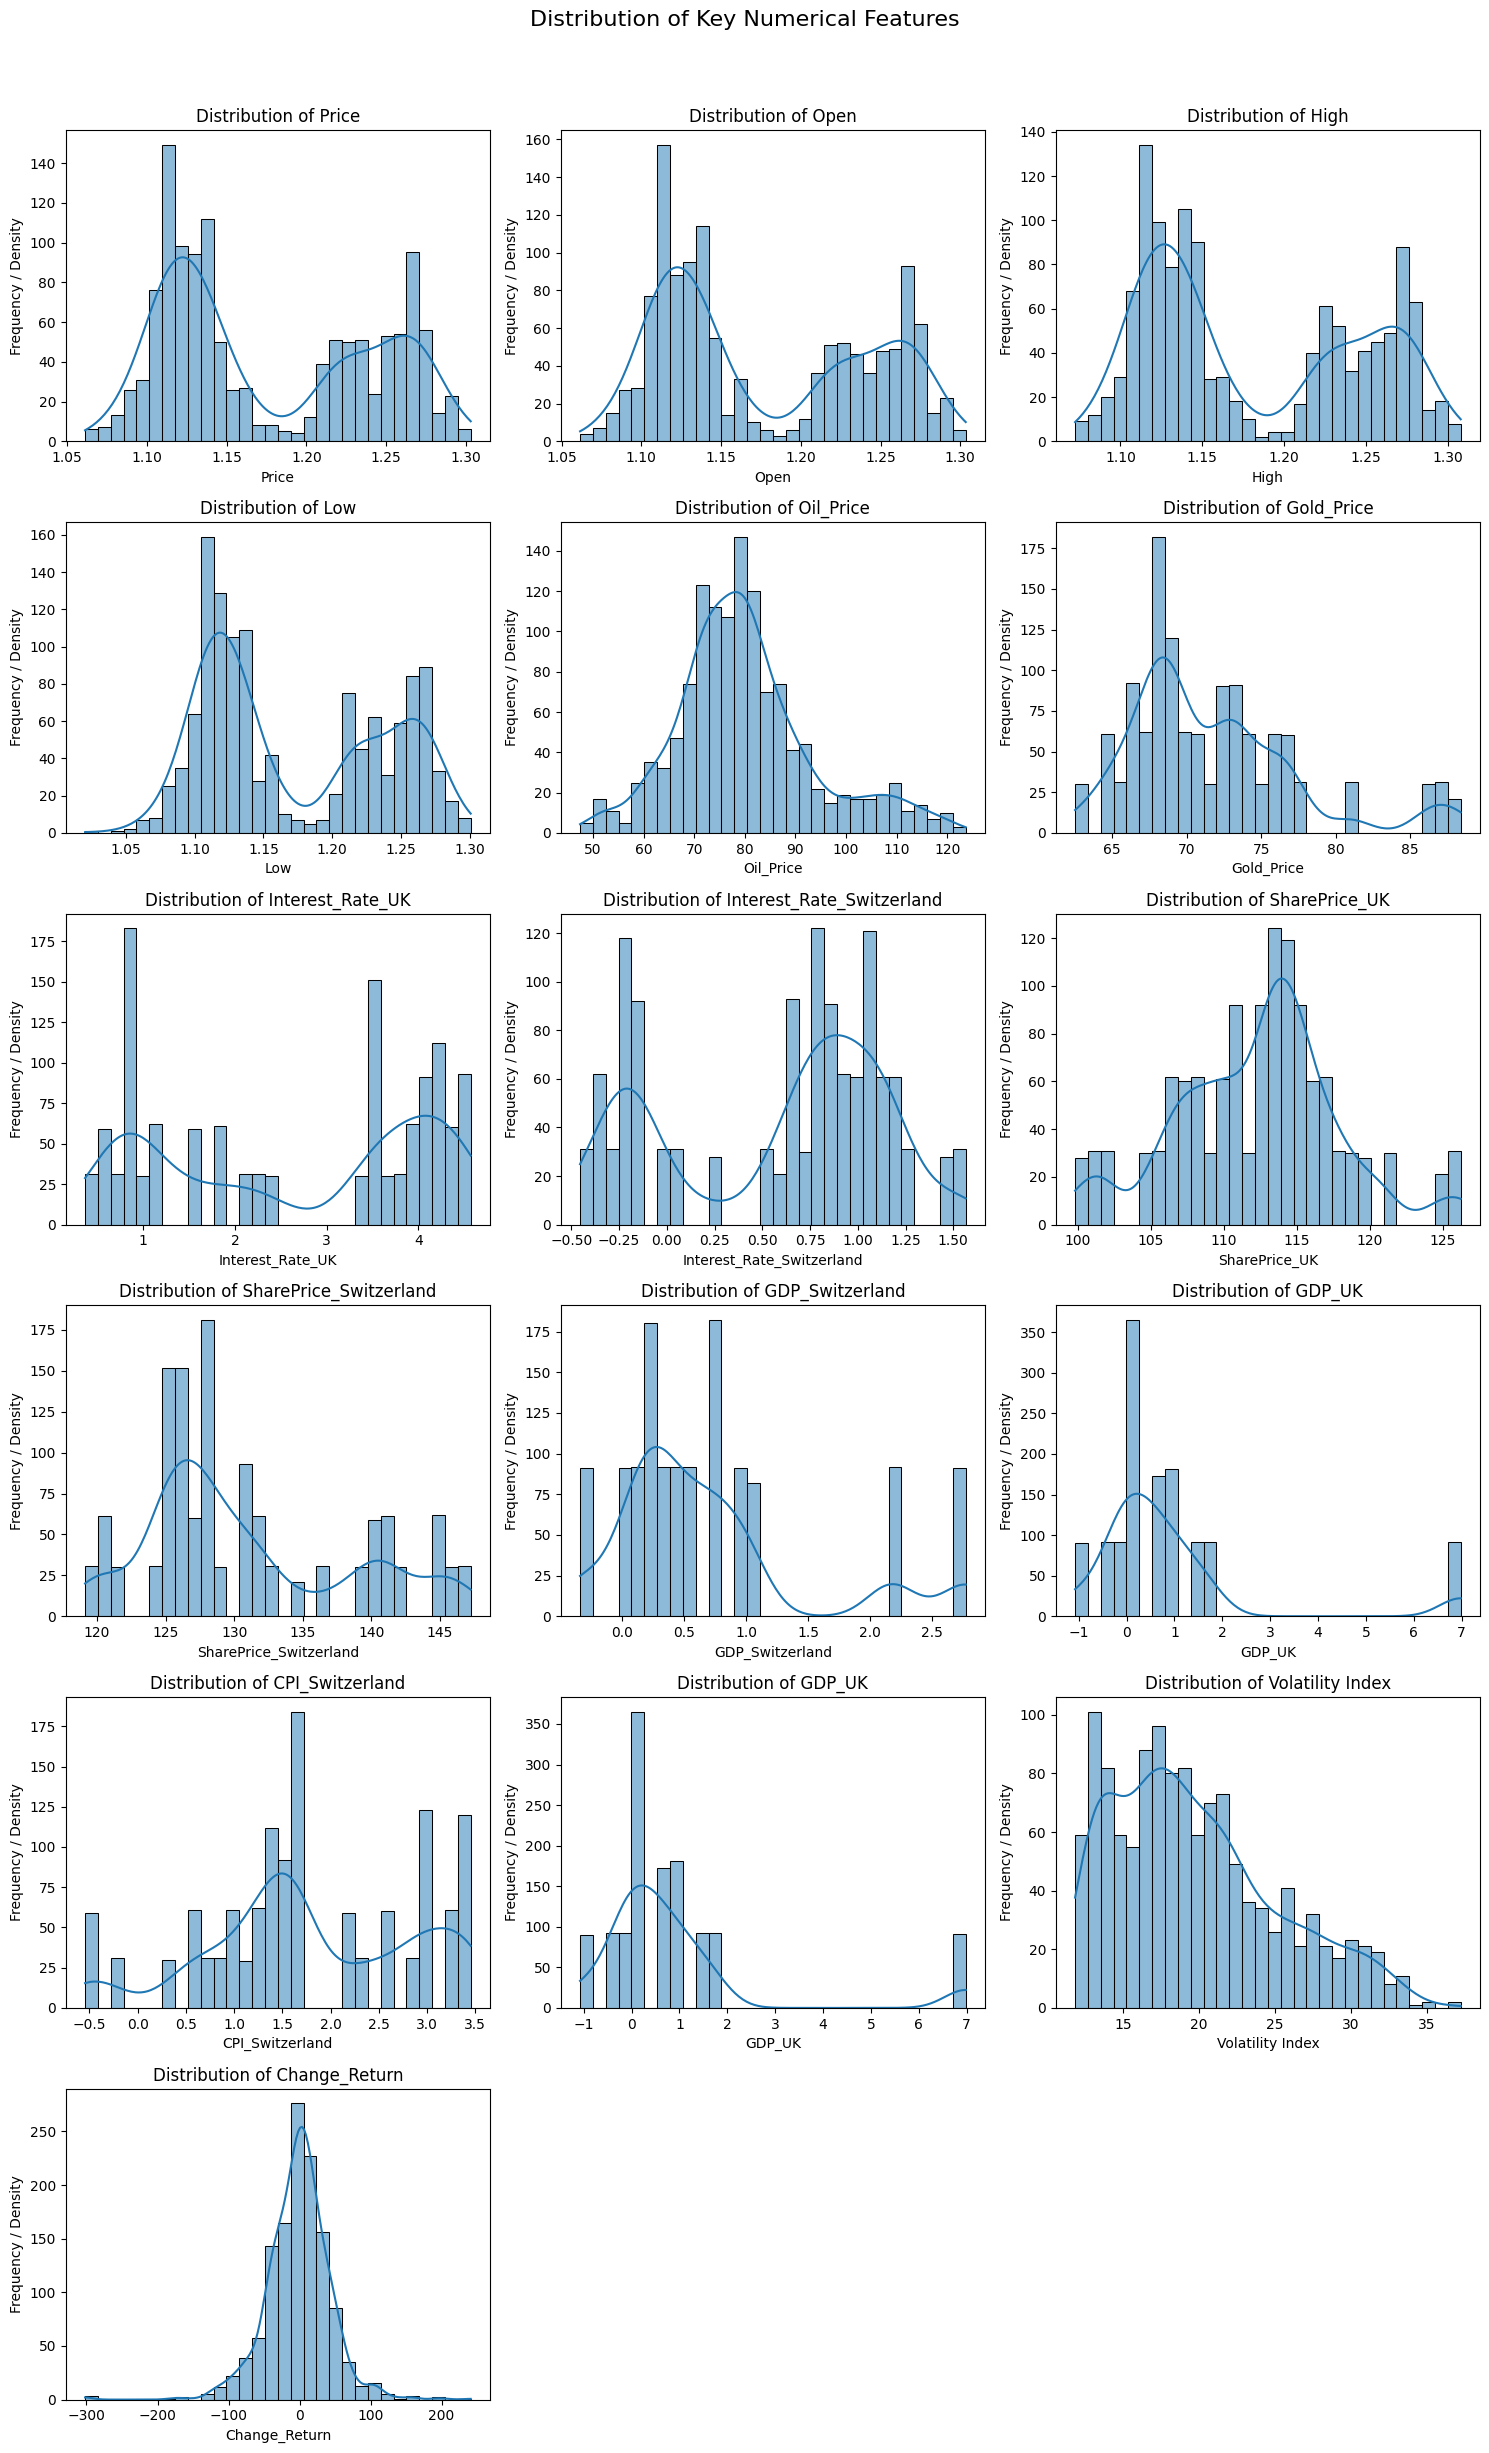

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a list of the numerical features to be visualized
features_to_visualize = [
    'Price', 'Open', 'High', 'Low',
    'Oil_Price', 'Gold_Price',
    'Interest_Rate_UK', 'Interest_Rate_Switzerland',
    'SharePrice_UK','SharePrice_Switzerland',
    'GDP_Switzerland', 'GDP_UK',
    'CPI_Switzerland', 'GDP_UK',
    'Volatility Index','Change_Return',
]

# 2. Determine the number of subplots needed and set up a figure with an appropriate grid layout
n_features = len(features_to_visualize)
n_cols = 3  # For example, 3 columns
n_rows = (n_features + n_cols - 1) // n_cols # Calculate rows needed

plt.figure(figsize=(n_cols * 5, n_rows * 4))

# 3. Iterate through the list of features and create a histogram with KDE for each
for i, feature in enumerate(features_to_visualize):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[feature], kde=True, bins=30) # Using df directly as data was loaded before
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.xlabel(feature)
    plt.ylabel('Frequency / Density')

# 4. Add a main title for the entire figure
plt.suptitle('Distribution of Key Numerical Features', fontsize=16, y=1.02)

# 5. Adjust the layout of the subplots to prevent overlapping titles or labels
plt.tight_layout()

# 6. Display the plot
plt.show()

**2.4 Correlation MatriX (Heatmap)**

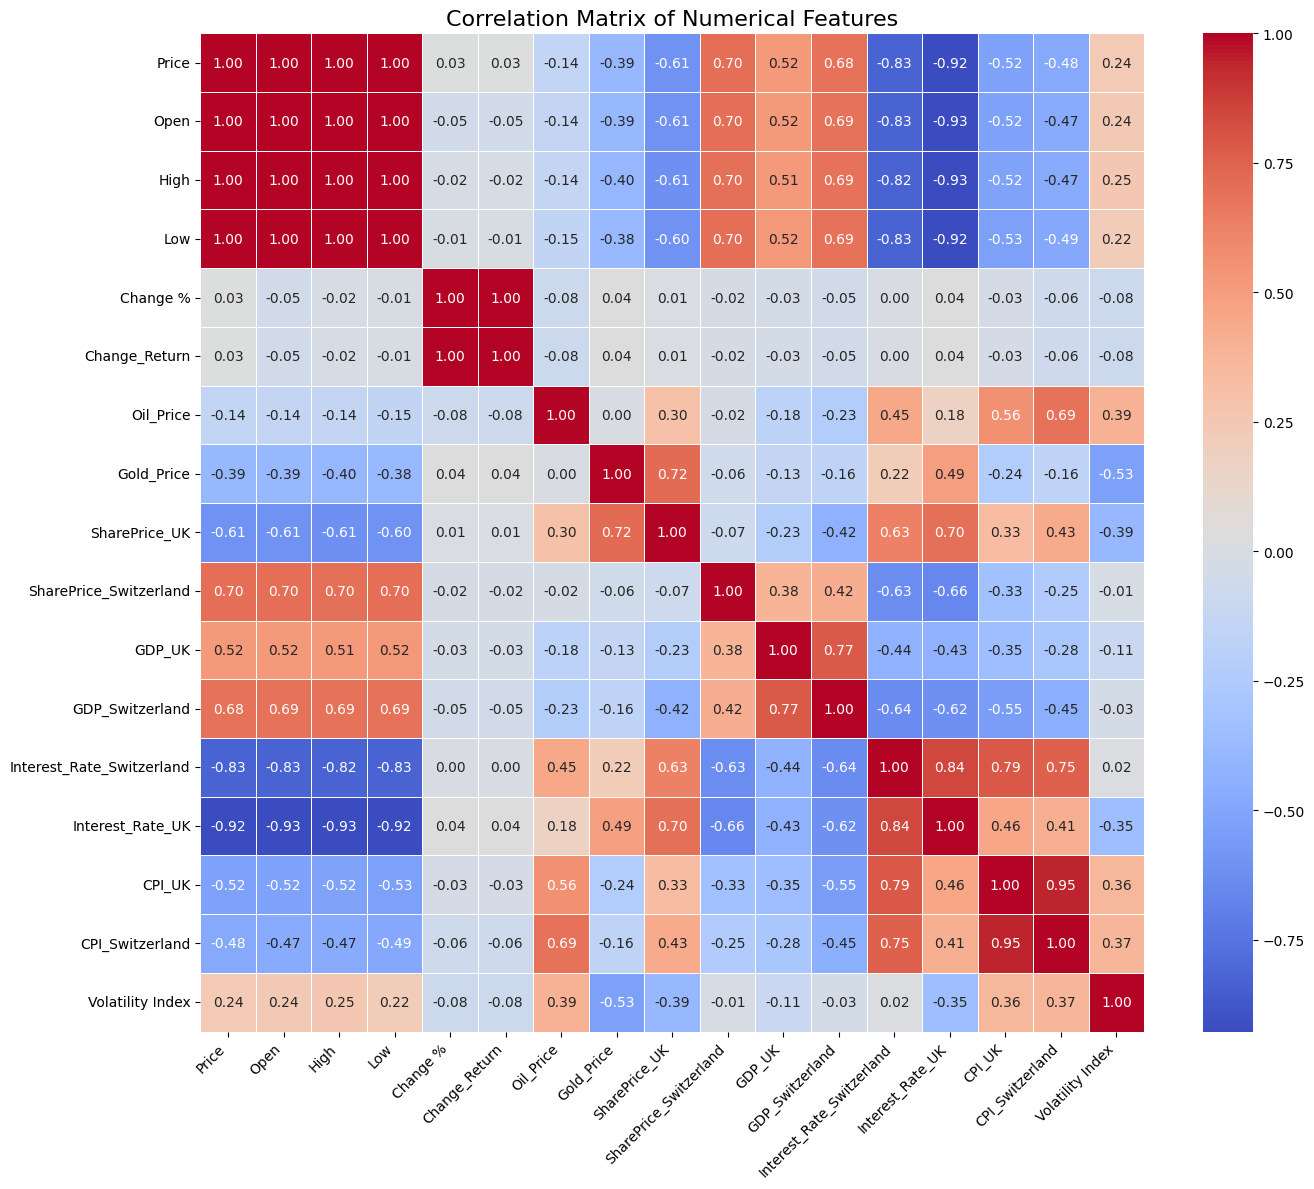

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(14, 12)) # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**2.5 Plot Price Over Time**

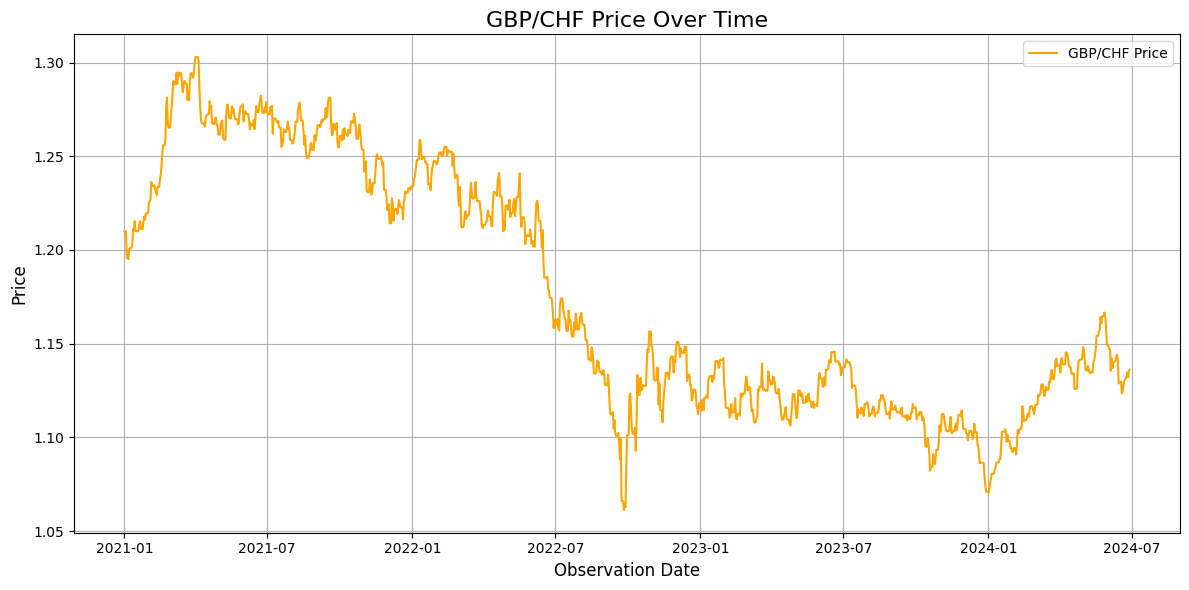

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Convert 'observation_date' to datetime and set as index
# Only perform these operations if 'observation_date' is still a column
if 'observation_date' in df.columns:
    df['observation_date'] = pd.to_datetime(df['observation_date'], format='%d/%m/%Y')
    df.set_index('observation_date', inplace=True)
# If 'observation_date' is not a column, it means it has likely already been set as the index,
# so no action is needed here.

# 2. Create a time-series plot of the 'Price' column
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], label='GBP/CHF Price', color='orange')

# 3. Add a title to the plot
plt.title('GBP/CHF Price Over Time', fontsize=16)

# 4. Label the x-axis and y-axis
plt.xlabel('Observation Date', fontsize=12)
plt.ylabel('Price', fontsize=12)

# 5. Include a legend
plt.legend()

# 6. Add a grid to the plot
plt.grid(True)

# 7. Display the plot
plt.tight_layout()
plt.show()

### Min-Max Scaling on the entire DataFrame

Min-Max scaling transforms features by scaling each feature to a given range, typically between 0 and 1. This is done by subtracting the minimum value of the feature and then dividing by the range (maximum - minimum).

$$X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

This process is applied to all numerical columns in the DataFrame.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

print('Applying Min-Max scaling to the DataFrame...')

# Select only numerical columns for scaling
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numerical = df[numerical_cols]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling
df_scaled_array = scaler.fit_transform(df_numerical)

# Create a new DataFrame with the scaled values and original index and column names
df_scaled = pd.DataFrame(df_scaled_array, columns=numerical_cols, index=df.index)

print('Min-Max scaling completed. Displaying the first 5 rows of the scaled DataFrame:')
display(df_scaled.head())

Applying Min-Max scaling to the DataFrame...
Min-Max scaling completed. Displaying the first 5 rows of the scaled DataFrame:


,Price,Open,High,Low,Change %,Change_Return,Oil_Price,Gold_Price,SharePrice_UK,SharePrice_Switzerland,GDP_UK,GDP_Switzerland,Interest_Rate_Switzerland,Interest_Rate_UK,CPI_UK,CPI_Switzerland,Volatility Index
observation_date,,,,,,,,,,,,,,,,,
2021-01-01,0.615385,0.615385,0.654630,0.678087,0.552486,0.552486,0.000000,0.397683,0.059488,0.247821,0.0,0.340387,0.0,0.0,0.022573,0.0,0.596055
2021-01-02,0.615385,0.615385,0.654630,0.678087,0.552486,0.552486,0.000000,0.397683,0.059488,0.247821,0.0,0.340387,0.0,0.0,0.022573,0.0,0.596055
2021-01-03,0.615385,0.615385,0.654630,0.678087,0.552486,0.552486,0.000000,0.397683,0.059488,0.247821,0.0,0.340387,0.0,0.0,0.022573,0.0,0.596055
2021-01-04,0.556658,0.612903,0.590059,0.615632,0.340700,0.340700,0.000000,0.397683,0.059488,0.247821,0.0,0.340387,0.0,0.0,0.022573,0.0,0.596055
2021-01-05,0.558726,0.557486,0.535684,0.612777,0.563536,0.563536,0.030327,0.397683,0.059488,0.247821,0.0,0.340387,0.0,0.0,0.022573,0.0,0.531755


# **3.0 Define Target**

In [ ]:
y = df_scaled['Change_Return']
X = df_scaled.drop(columns=['Change_Return','Change %'], errors='ignore')

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 rows of X:")
display(X.head())

Shape of X: (1268, 15)
Shape of y: (1268,)
First 5 rows of X:


,Price,Open,High,Low,Oil_Price,Gold_Price,SharePrice_UK,SharePrice_Switzerland,GDP_UK,GDP_Switzerland,Interest_Rate_Switzerland,Interest_Rate_UK,CPI_UK,CPI_Switzerland,Volatility Index
observation_date,,,,,,,,,,,,,,,
2021-01-01,0.615385,0.615385,0.654630,0.678087,0.000000,0.397683,0.059488,0.247821,0.0,0.340387,0.0,0.0,0.022573,0.0,0.596055
2021-01-02,0.615385,0.615385,0.654630,0.678087,0.000000,0.397683,0.059488,0.247821,0.0,0.340387,0.0,0.0,0.022573,0.0,0.596055
2021-01-03,0.615385,0.615385,0.654630,0.678087,0.000000,0.397683,0.059488,0.247821,0.0,0.340387,0.0,0.0,0.022573,0.0,0.596055
2021-01-04,0.556658,0.612903,0.590059,0.615632,0.000000,0.397683,0.059488,0.247821,0.0,0.340387,0.0,0.0,0.022573,0.0,0.596055
2021-01-05,0.558726,0.557486,0.535684,0.612777,0.030327,0.397683,0.059488,0.247821,0.0,0.340387,0.0,0.0,0.022573,0.0,0.531755


# **Model Development**

**4.1 Split Data: 80% Train, 20% test**

In [ ]:
# Split Data: 80% Train, 20% Test (Sequential split for time-series)
split = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

In [ ]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

# **Train ALL Tree-Based Models + Compare Performance**

In [ ]:
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=300),
    "GBM": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=4),
    "CatBoost": CatBoostRegressor(verbose=0)
}

results = []

for name, model in models.items():
    model.fit(X_train_scale, y_train)
    pred = model.predict(X_test_scale)

    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)

    results.append([name, mae, rmse, r2])

In [ ]:
# Convert to DataFrame for clear comparison
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2"])
print(results_df.sort_values("R2", ascending=False))

           Model       MAE      RMSE        R2
4       CatBoost  0.031150  0.041711  0.590751
1  Random Forest  0.035450  0.048598  0.444466
3        XGBoost  0.039235  0.054707  0.296019
2            GBM  0.042405  0.060750  0.131907
0  Decision Tree  0.065588  0.092114 -0.995873


### Train CatBoost Model with Scaled Data

Train a `CatBoostRegressor` model using the `X_train_scale` and `y_train` data. This model uses standard scaled features but without lag features or Lasso selection.

In [ ]:
from catboost import CatBoostRegressor

print('Training CatBoost model with scaled data...')

# Initialize CatBoostRegressor with default parameters
catboost_scaled_model = CatBoostRegressor(random_seed=42, verbose=0, loss_function='RMSE')

# Fit the model to the scaled training data
catboost_scaled_model.fit(X_train_scale, y_train)

print('CatBoost model with scaled data trained successfully.')

Training CatBoost model with scaled data...
CatBoost model with scaled data trained successfully.


### Make Predictions with CatBoost Model (Scaled Data)

Make predictions on the `X_test_scale` dataset using the `catboost_scaled_model`.

In [ ]:
print('Making predictions with the CatBoost model (scaled data)...')
preds_catboost_scaled = catboost_scaled_model.predict(X_test_scale)
print('Predictions with CatBoost model (scaled data) made successfully.')

Making predictions with the CatBoost model (scaled data)...
Predictions with CatBoost model (scaled data) made successfully.


### Evaluate CatBoost Model Performance (Scaled Data)

Evaluate the performance of the `catboost_scaled_model` by calculating Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R2) score, and Directional Accuracy (DA) using the `y_test` and `preds_catboost_scaled`.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import numpy as np

print('Evaluating the CatBoost model (scaled data)...')

# Calculate Mean Absolute Error (MAE)
mae_catboost_scaled = mean_absolute_error(y_test, preds_catboost_scaled)

# Calculate Mean Squared Error (MSE)
mse_catboost_scaled = mean_squared_error(y_test, preds_catboost_scaled)

# Calculate Root Mean Squared Error (RMSE)
rmse_catboost_scaled = np.sqrt(mse_catboost_scaled)

# Calculate R-squared (R2) score
r2_catboost_scaled = r2_score(y_test, preds_catboost_scaled)

# Calculate Directional Accuracy (DA)
actual_direction_catboost_scaled = np.sign(y_test)
predicted_direction_catboost_scaled = np.sign(preds_catboost_scaled)
directional_accuracy_catboost_scaled = accuracy_score(actual_direction_catboost_scaled, predicted_direction_catboost_scaled)

# Print the evaluation metrics
print(f"CatBoost (Scaled Data) Mean Absolute Error (MAE): {mae_catboost_scaled:.4f}")
print(f"CatBoost (Scaled Data) Mean Squared Error (MSE): {mse_catboost_scaled:.4f}")
print(f"CatBoost (Scaled Data) Root Mean Squared Error (RMSE): {rmse_catboost_scaled:.4f}")
print(f"CatBoost (Scaled Data) R-squared (R2) Score: {r2_catboost_scaled:.4f}")
print(f"CatBoost (Scaled Data) Directional Accuracy (DA): {directional_accuracy_catboost_scaled:.4f}")
print('Evaluation of CatBoost model (scaled data) complete.')

Evaluating the CatBoost model (scaled data)...
CatBoost (Scaled Data) Mean Absolute Error (MAE): 0.0313
CatBoost (Scaled Data) Mean Squared Error (MSE): 0.0016
CatBoost (Scaled Data) Root Mean Squared Error (RMSE): 0.0404
CatBoost (Scaled Data) R-squared (R2) Score: 0.6153
CatBoost (Scaled Data) Directional Accuracy (DA): 1.0000
Evaluation of CatBoost model (scaled data) complete.


### Visualize CatBoost Model Predictions (Scaled Data)

Generate a plot comparing the actual `y_test` values against the predictions from the CatBoost model trained on scaled data (`preds_catboost_scaled`).

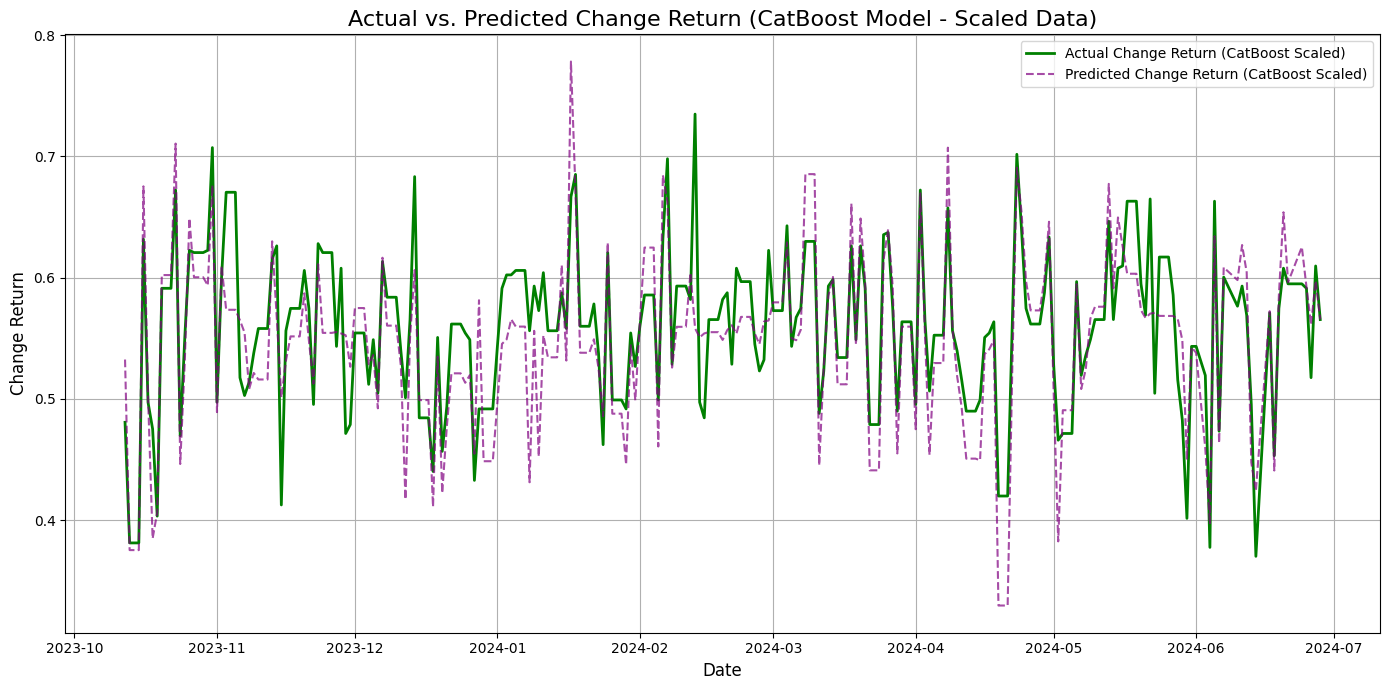

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with a specified size
plt.figure(figsize=(14, 7))

# Plot the actual y_test values
plt.plot(y_test.index, y_test, label='Actual Change Return (CatBoost Scaled)', color='green', linewidth=2)

# Plot the preds_catboost_scaled values
plt.plot(y_test.index, preds_catboost_scaled, label='Predicted Change Return (CatBoost Scaled)', color='purple', linestyle='--', alpha=0.7)

# Add a title to the plot
plt.title('Actual vs. Predicted Change Return (CatBoost Model - Scaled Data)', fontsize=16)

# Label the x-axis and y-axis
plt.xlabel('Date', fontsize=12)
plt.ylabel('Change Return', fontsize=12)

# Display a legend
plt.legend()

# Add a grid for better readability
plt.grid(True)

# Ensure the layout is tight
plt.tight_layout()

# Show the plot
plt.show()

### Explainable AI: SHAP Analysis for CatBoost Model (Scaled Data)

Perform SHAP analysis on the `catboost_scaled_model` (trained with scaled data) to understand feature importances and their impact on predictions.

In [ ]:
import shap
import matplotlib.pyplot as plt

# Initialize Javascript for SHAP plots
shap.initjs()

print('Initializing SHAP Explainer for the CatBoost model (scaled data)...')
explainer_catboost_scaled = shap.TreeExplainer(catboost_scaled_model)

print('Calculating SHAP values for the CatBoost model (scaled data) test set...')
# SHAP expects a numpy array or DataFrame, not a scaled array from StandardScaler if original column names are important
# X_test_scale is already a numpy array from StandardScaler, so it's fine.
shap_values_catboost_scaled = explainer_catboost_scaled.shap_values(X_test_scale)

print('SHAP values calculated successfully for the CatBoost model (scaled data).')

Initializing SHAP Explainer for the CatBoost model (scaled data)...
Calculating SHAP values for the CatBoost model (scaled data) test set...
SHAP values calculated successfully for the CatBoost model (scaled data).


### SHAP Summary Plot: CatBoost Model (Scaled Data)

Generate a SHAP summary plot to visualize the overall impact and importance of each feature on the CatBoost model's predictions.

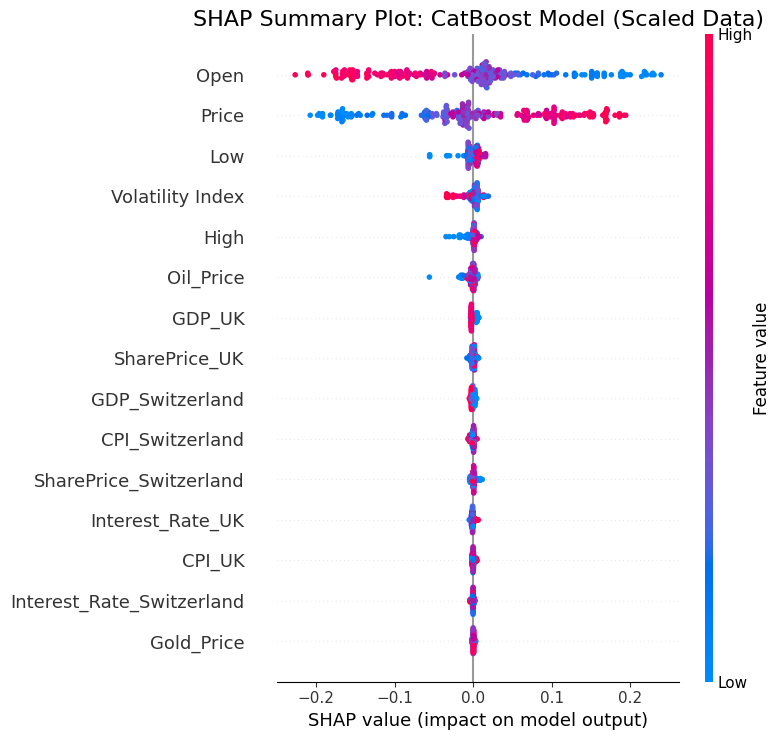

In [ ]:
import matplotlib.pyplot as plt

# Summary Plot

plt.figure(figsize=(12, 10))
# We need feature names for the summary plot, which X_test_scale (ndarray) doesn't directly have.
# Use the original X_test columns for labels, even though the values are from X_test_scale.
shap.summary_plot(shap_values_catboost_scaled, X_test, feature_names=X_test.columns.tolist(), show=False)
plt.title("SHAP Summary Plot: CatBoost Model (Scaled Data)", fontsize=16)
plt.tight_layout()
plt.show()

### SHAP Waterfall Plot: CatBoost Model (Scaled Data)

Generate a SHAP waterfall plot for a single instance from the test set to explain a specific prediction of the CatBoost model.

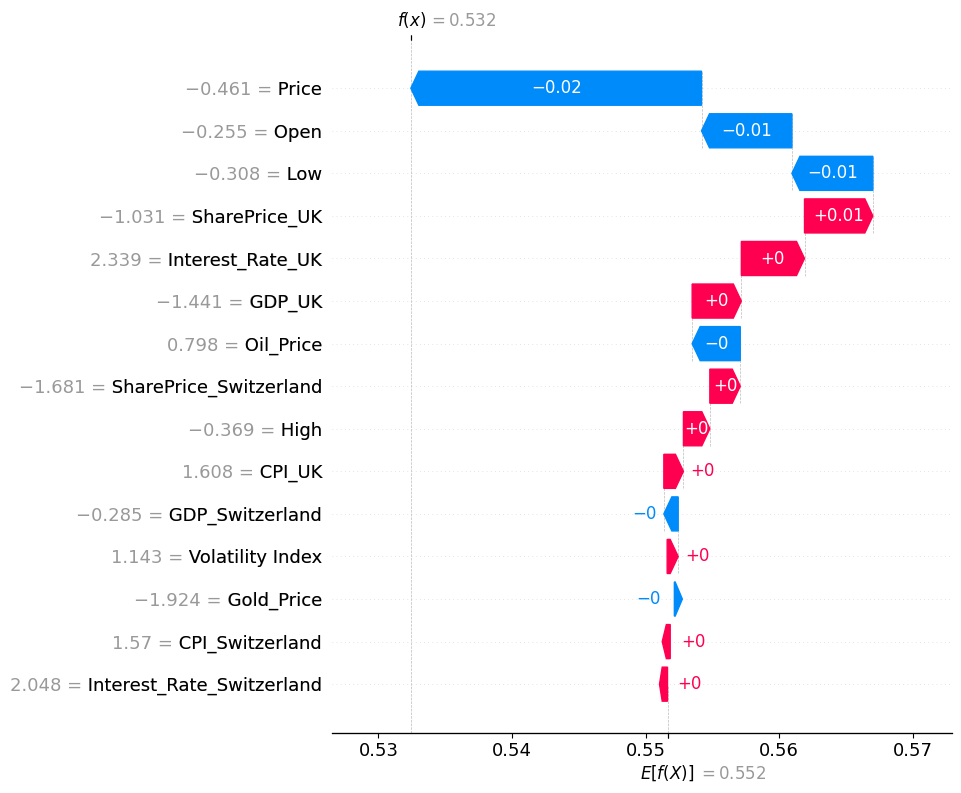

<Figure size 640x480 with 0 Axes>

In [ ]:
import shap
import matplotlib.pyplot as plt

# Choose an instance to explain (e.g., the first instance from the test set)
# You can change the index to any value within the range of X_test_scale
instance_index = 0

# Get the SHAP values for that specific instance
shap_values_instance_catboost_scaled = shap_values_catboost_scaled[instance_index]

# Get the feature values for that specific instance (from the scaled data)
feature_values_instance_catboost_scaled = X_test_scale[instance_index]

# Create a shap.Explanation object which is required for the waterfall plot
explanation_object_catboost_scaled = shap.Explanation(
    values=shap_values_instance_catboost_scaled,
    base_values=explainer_catboost_scaled.expected_value,
    data=feature_values_instance_catboost_scaled,
    feature_names=X_test.columns.tolist() # Use original feature names for readability
)

# Create the waterfall plot
shap.waterfall_plot(explanation_object_catboost_scaled, max_display=15)
plt.tight_layout()
plt.show()

### Feature Selection based on SHAP Mean Absolute Values

This section demonstrates how to use the mean absolute SHAP values to identify and select the most important features from the dataset. Features with higher mean absolute SHAP values have a greater average impact on the model's predictions.

### Feature Selection based on SHAP Mean Absolute Values

This section demonstrates how to use the mean absolute SHAP values to identify and select the most important features from the dataset. Features with higher mean absolute SHAP values have a greater average impact on the model's predictions.

Calculating mean absolute SHAP values for feature selection...
Top 10 features based on mean absolute SHAP values:


,Feature,Mean_Abs_SHAP
1,Open,0.084994
0,Price,0.080507
3,Low,0.006077
14,Volatility Index,0.005310
2,High,0.003364
4,Oil_Price,0.003185
8,GDP_UK,0.002649
6,SharePrice_UK,0.001788
9,GDP_Switzerland,0.001566
13,CPI_Switzerland,0.001527


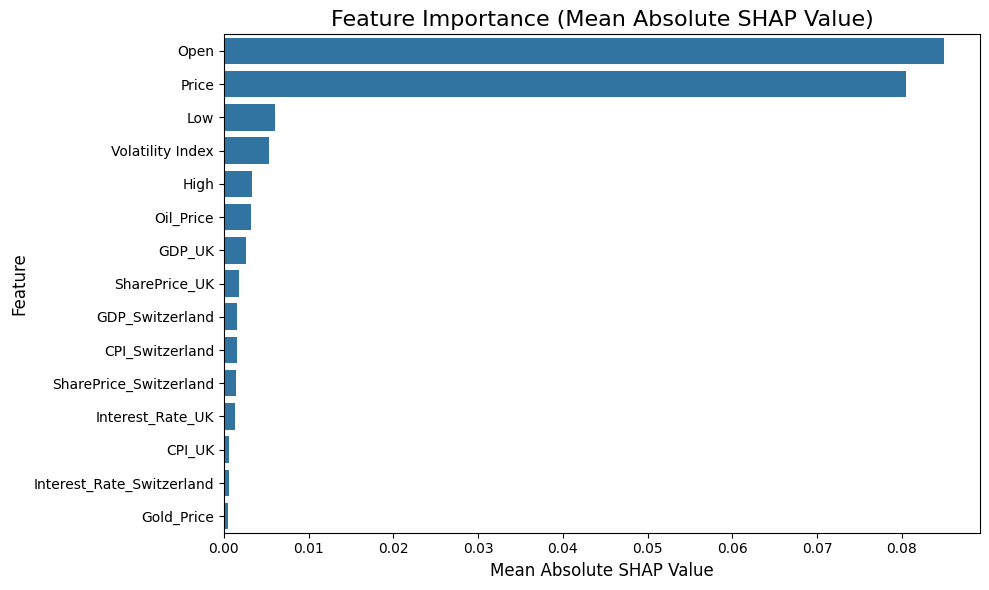

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('Calculating mean absolute SHAP values for feature selection...')

# Calculate the mean absolute SHAP value for each feature
# shap_values_catboost_scaled is already a numpy array from explainer_catboost_scaled.shap_values(X_test_scale)
mean_abs_shap_values = np.mean(np.abs(shap_values_catboost_scaled), axis=0)

# Get the feature names from X_test
feature_names = X_test.columns.tolist()

# Create a DataFrame for better visualization and sorting
shap_importance = pd.DataFrame({
    'Feature': feature_names,
    'Mean_Abs_SHAP': mean_abs_shap_values
})

# Sort the features by their mean absolute SHAP values in descending order
shap_importance = shap_importance.sort_values(by='Mean_Abs_SHAP', ascending=False)

print('Top 10 features based on mean absolute SHAP values:')
display(shap_importance.head(10))

# Visualize the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Mean_Abs_SHAP', y='Feature', data=shap_importance)
plt.title('Feature Importance (Mean Absolute SHAP Value)', fontsize=16)
plt.xlabel('Mean Absolute SHAP Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

### Selecting Features Based on a SHAP Importance Threshold

Once you have the ranked feature importances, you can select a subset of features by setting a threshold. This could be selecting the top N features or selecting all features whose mean absolute SHAP value is above a certain value.

In [ ]:
print('Selecting features based on a threshold...')

# Define a threshold for mean absolute SHAP value
# You can adjust this value based on your analysis of the importance plot
importance_threshold = 0.005 # Example threshold value

# Select features whose mean absolute SHAP value is above the threshold
selected_features_shap = shap_importance[shap_importance['Mean_Abs_SHAP'] > importance_threshold]['Feature'].tolist()

print(f"Number of features selected: {len(selected_features_shap)}")
print(f"Selected features based on SHAP importance (> {importance_threshold}):")
print(selected_features_shap)

# Now you can create new X_train and X_test DataFrames with only these selected features
# Remember that X_train_scale and X_test_scale are numpy arrays, so we need to map back to original feature names

# Get the indices of the selected features in the original X_train/X_test columns
selected_feature_indices = [X_test.columns.get_loc(col) for col in selected_features_shap]

X_train_selected_shap = X_train_scale[:, selected_feature_indices]
X_test_selected_shap = X_test_scale[:, selected_feature_indices]

print("\nShape of X_train_selected_shap:", X_train_selected_shap.shape)
print("Shape of X_test_selected_shap:", X_test_selected_shap.shape)

print("These new datasets (X_train_selected_shap, X_test_selected_shap) can now be used to retrain your model with a reduced feature set.")

Selecting features based on a threshold...
Number of features selected: 4
Selected features based on SHAP importance (> 0.005):
['Open', 'Price', 'Low', 'Volatility Index']

Shape of X_train_selected_shap: (1014, 4)
Shape of X_test_selected_shap: (254, 4)
These new datasets (X_train_selected_shap, X_test_selected_shap) can now be used to retrain your model with a reduced feature set.


### Retrain CatBoost Model with SHAP-Selected Features

Train a `CatBoostRegressor` model using only the features identified as important by the SHAP analysis (`X_train_selected_shap`).

In [ ]:
from catboost import CatBoostRegressor

print('Retraining CatBoost model with SHAP-selected features...')

# Initialize CatBoostRegressor with default parameters
catboost_shap_model = CatBoostRegressor(random_seed=42, verbose=0, loss_function='RMSE')

# Fit the model to the training data with SHAP-selected features
catboost_shap_model.fit(X_train_selected_shap, y_train)

print('CatBoost model with SHAP-selected features trained successfully.')

Retraining CatBoost model with SHAP-selected features...
CatBoost model with SHAP-selected features trained successfully.


### Make Predictions with CatBoost Model (SHAP-Selected Features)

Make predictions on the `X_test_selected_shap` dataset using the `catboost_shap_model`.

In [ ]:
print('Making predictions with the CatBoost model (SHAP-selected features)...')
preds_catboost_shap = catboost_shap_model.predict(X_test_selected_shap)
print('Predictions with CatBoost model (SHAP-selected features) made successfully.')

Making predictions with the CatBoost model (SHAP-selected features)...
Predictions with CatBoost model (SHAP-selected features) made successfully.


### Evaluate CatBoost Model Performance (SHAP-Selected Features)

Evaluate the performance of the `catboost_shap_model` by calculating Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R2) score, and Directional Accuracy (DA) using the `y_test` and `preds_catboost_shap`.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import numpy as np

print('Evaluating the CatBoost model (SHAP-selected features)...')

# Calculate Mean Absolute Error (MAE)
mae_catboost_shap = mean_absolute_error(y_test, preds_catboost_shap)

# Calculate Mean Squared Error (MSE)
mse_catboost_shap = mean_squared_error(y_test, preds_catboost_shap)

# Calculate Root Mean Squared Error (RMSE)
rmse_catboost_shap = np.sqrt(mse_catboost_shap)

# Calculate R-squared (R2) score
r2_catboost_shap = r2_score(y_test, preds_catboost_shap)

# Calculate Directional Accuracy (DA)
actual_direction_catboost_shap = np.sign(y_test)
predicted_direction_catboost_shap = np.sign(preds_catboost_shap)
directional_accuracy_catboost_shap = accuracy_score(actual_direction_catboost_shap, predicted_direction_catboost_shap)

# Print the evaluation metrics
print(f"CatBoost (SHAP-Selected Features) Mean Absolute Error (MAE): {mae_catboost_shap:.4f}")
print(f"CatBoost (SHAP-Selected Features) Mean Squared Error (MSE): {mse_catboost_shap:.4f}")
print(f"CatBoost (SHAP-Selected Features) Root Mean Squared Error (RMSE): {rmse_catboost_shap:.4f}")
print(f"CatBoost (SHAP-Selected Features) R-squared (R2) Score: {r2_catboost_shap:.4f}")
print(f"CatBoost (SHAP-Selected Features) Directional Accuracy (DA): {directional_accuracy_catboost_shap:.4f}")
print('Evaluation of CatBoost model (SHAP-selected features) complete.')

Evaluating the CatBoost model (SHAP-selected features)...
CatBoost (SHAP-Selected Features) Mean Absolute Error (MAE): 0.0343
CatBoost (SHAP-Selected Features) Mean Squared Error (MSE): 0.0021
CatBoost (SHAP-Selected Features) Root Mean Squared Error (RMSE): 0.0456
CatBoost (SHAP-Selected Features) R-squared (R2) Score: 0.5113
CatBoost (SHAP-Selected Features) Directional Accuracy (DA): 1.0000
Evaluation of CatBoost model (SHAP-selected features) complete.


**Interpretation**

That's a very insightful observation and a common question when performing feature selection! There are several reasons **why the R-squared might decrease**, even after selecting features based on SHAP importance:

- **R-squared measures explained variance**: R-squared (R2) quantifies the proportion of the variance in the dependent variable that is predictable from the independent variables. When you remove features, even if they are less important individually, you are essentially removing some amount of information that the model was previously using to explain that variance. Even if a feature has a small average SHAP value, it might contribute to explaining variance in specific scenarios or in combination with other features.

- **Loss of subtle signals**: While SHAP identifies features with the highest average impact, it's possible that the features removed, though less impactful on average, still contained subtle predictive signals that, when combined, contributed to the overall R-squared. The model with all features had access to more information, even if some of it was noisy or had less consistent impact.

- **Threshold impact**: The importance_threshold = 0.005 you set was a specific cutoff. Features with mean absolute SHAP values just below this threshold were removed. It's possible that some of these removed features collectively held enough predictive power to make a noticeable difference in the R-squared.

- **Model complexity vs. predictive power trade-off**: Sometimes, a slightly more complex model (with more features) might achieve a higher R-squared because it can capture more nuances in the data. Feature selection aims for simpler models, which are often more interpretable and generalize better (less overfitting), but this might come at a slight cost to pure predictive performance (R-squared) on the training/test set.

The R-squared went from 0.6153 (with all features) down to 0.5113 (with 4 SHAP-selected features). This drop suggests that the 11 features you removed, while individually less important, collectively contributed about 10% of the explained variance in the Change_Return. While the simpler model might be faster or easier to understand, the more complex model with all features is currently explaining more of the variability in the target variable.



### Visualize CatBoost Model Predictions (SHAP-Selected Features)

Generate a plot comparing the actual `y_test` values against the predictions from the CatBoost model trained on SHAP-selected features (`preds_catboost_shap`).

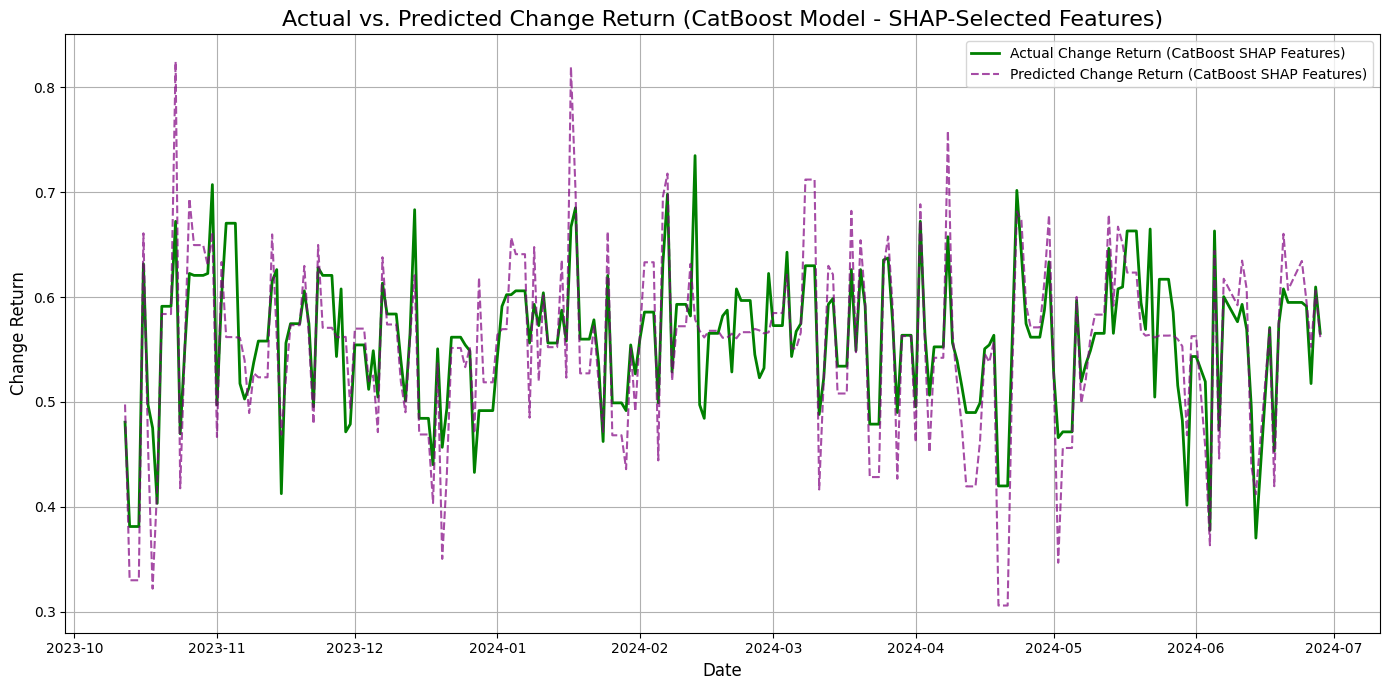

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with a specified size
plt.figure(figsize=(14, 7))

# Plot the actual y_test values
plt.plot(y_test.index, y_test, label='Actual Change Return (CatBoost SHAP Features)', color='green', linewidth=2)

# Plot the preds_catboost_shap values
plt.plot(y_test.index, preds_catboost_shap, label='Predicted Change Return (CatBoost SHAP Features)', color='purple', linestyle='--', alpha=0.7)

# Add a title to the plot
plt.title('Actual vs. Predicted Change Return (CatBoost Model - SHAP-Selected Features)', fontsize=16)

# Label the x-axis and y-axis
plt.xlabel('Date', fontsize=12)
plt.ylabel('Change Return', fontsize=12)

# Display a legend
plt.legend()

# Add a grid for better readability
plt.grid(True)

# Ensure the layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# **Experiment with a different SHAP importance threshold**

In [ ]:
print('Selecting features based on a threshold...')

# Define a threshold for mean absolute SHAP value
# You can adjust this value based on your analysis of the importance plot
importance_threshold = 0.002 # New example threshold value, lowered to include more features

# Select features whose mean absolute SHAP value is above the threshold
selected_features_shap = shap_importance[shap_importance['Mean_Abs_SHAP'] > importance_threshold]['Feature'].tolist()

print(f"Number of features selected: {len(selected_features_shap)}")
print(f"Selected features based on SHAP importance (> {importance_threshold}):")
print(selected_features_shap)

# Now you can create new X_train and X_test DataFrames with only these selected features
# Remember that X_train_scale and X_test_scale are numpy arrays, so we need to map back to original feature names

# Get the indices of the selected features in the original X_train/X_test columns
selected_feature_indices = [X_test.columns.get_loc(col) for col in selected_features_shap]

X_train_selected_shap = X_train_scale[:, selected_feature_indices]
X_test_selected_shap = X_test_scale[:, selected_feature_indices]

print("\nShape of X_train_selected_shap:", X_train_selected_shap.shape)
print("Shape of X_test_selected_shap:", X_test_selected_shap.shape)

print("These new datasets (X_train_selected_shap, X_test_selected_shap) can now be used to retrain your model with a reduced feature set.")

Selecting features based on a threshold...
Number of features selected: 7
Selected features based on SHAP importance (> 0.002):
['Open', 'Price', 'Low', 'Volatility Index', 'High', 'Oil_Price', 'GDP_UK']

Shape of X_train_selected_shap: (1014, 7)
Shape of X_test_selected_shap: (254, 7)
These new datasets (X_train_selected_shap, X_test_selected_shap) can now be used to retrain your model with a reduced feature set.


### Retrain CatBoost Model with SHAP-Selected Features

Train a `CatBoostRegressor` model using only the features identified as important by the SHAP analysis (`X_train_selected_shap`).

In [ ]:
from catboost import CatBoostRegressor

print('Retraining CatBoost model with SHAP-selected features...')

# Initialize CatBoostRegressor with default parameters
catboost_shap_model = CatBoostRegressor(random_seed=42, verbose=0, loss_function='RMSE')

# Fit the model to the training data with SHAP-selected features
catboost_shap_model.fit(X_train_selected_shap, y_train)

print('CatBoost model with SHAP-selected features trained successfully.')

Retraining CatBoost model with SHAP-selected features...
CatBoost model with SHAP-selected features trained successfully.


### Make Predictions with CatBoost Model (SHAP-Selected Features)

Make predictions on the `X_test_selected_shap` dataset using the `catboost_shap_model`.

In [ ]:
print('Making predictions with the CatBoost model (SHAP-selected features)...')
preds_catboost_shap = catboost_shap_model.predict(X_test_selected_shap)
print('Predictions with CatBoost model (SHAP-selected features) made successfully.')

Making predictions with the CatBoost model (SHAP-selected features)...
Predictions with CatBoost model (SHAP-selected features) made successfully.


### Evaluate CatBoost Model Performance (SHAP-Selected Features)

Evaluate the performance of the `catboost_shap_model` by calculating Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R2) score, and Directional Accuracy (DA) using the `y_test` and `preds_catboost_shap`.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import numpy as np

print('Evaluating the CatBoost model (SHAP-selected features)...')

# Calculate Mean Absolute Error (MAE)
mae_catboost_shap = mean_absolute_error(y_test, preds_catboost_shap)

# Calculate Mean Squared Error (MSE)
mse_catboost_shap = mean_squared_error(y_test, preds_catboost_shap)

# Calculate Root Mean Squared Error (RMSE)
rmse_catboost_shap = np.sqrt(mse_catboost_shap)

# Calculate R-squared (R2) score
r2_catboost_shap = r2_score(y_test, preds_catboost_shap)

# Calculate Directional Accuracy (DA)
actual_direction_catboost_shap = np.sign(y_test)
predicted_direction_catboost_shap = np.sign(preds_catboost_shap)
directional_accuracy_catboost_shap = accuracy_score(actual_direction_catboost_shap, predicted_direction_catboost_shap)

# Print the evaluation metrics
print(f"CatBoost (SHAP-Selected Features) Mean Absolute Error (MAE): {mae_catboost_shap:.4f}")
print(f"CatBoost (SHAP-Selected Features) Mean Squared Error (MSE): {mse_catboost_shap:.4f}")
print(f"CatBoost (SHAP-Selected Features) Root Mean Squared Error (RMSE): {rmse_catboost_shap:.4f}")
print(f"CatBoost (SHAP-Selected Features) R-squared (R2) Score: {r2_catboost_shap:.4f}")
print(f"CatBoost (SHAP-Selected Features) Directional Accuracy (DA): {directional_accuracy_catboost_shap:.4f}")
print('Evaluation of CatBoost model (SHAP-selected features) complete.')

Evaluating the CatBoost model (SHAP-selected features)...
CatBoost (SHAP-Selected Features) Mean Absolute Error (MAE): 0.0349
CatBoost (SHAP-Selected Features) Mean Squared Error (MSE): 0.0023
CatBoost (SHAP-Selected Features) Root Mean Squared Error (RMSE): 0.0476
CatBoost (SHAP-Selected Features) R-squared (R2) Score: 0.4665
CatBoost (SHAP-Selected Features) Directional Accuracy (DA): 1.0000
Evaluation of CatBoost model (SHAP-selected features) complete.


**Interpretation:**

Interestingly, increasing the number of selected features from 4 to 7 (by lowering the SHAP importance threshold) actually led to a further decrease in the R2 score (from 0.5113 to 0.4665) and slightly higher MAE/RMSE.

This suggests that:

- **Not all 'less important' features are beneficial**: The additional 3 features included (High, Oil_Price, GDP_UK) might not be providing genuinely useful predictive power for this model, or they could even be introducing more noise. While their mean absolute SHAP values were above the 0.002 threshold, they were below the 0.005 threshold, indicating a lower average impact.

- **Optimal feature set is crucial**: Simply adding more features, even if they have some positive SHAP importance, doesn't guarantee improved performance. The balance and interaction effects of the features are key.

This experiment highlights that selecting features based on a threshold is an iterative process. A higher R2 (0.6153) was achieved with all 15 features, and the 4 most impactful features (R2 0.5113) performed better than the 7 features. This could suggest that the initial 4 features are truly the most robust predictors, and adding more either adds noise or dilutes the signal.

### Visualize CatBoost Model Predictions (SHAP-Selected Features)

Generate a plot comparing the actual `y_test` values against the predictions from the CatBoost model trained on SHAP-selected features (`preds_catboost_shap`).

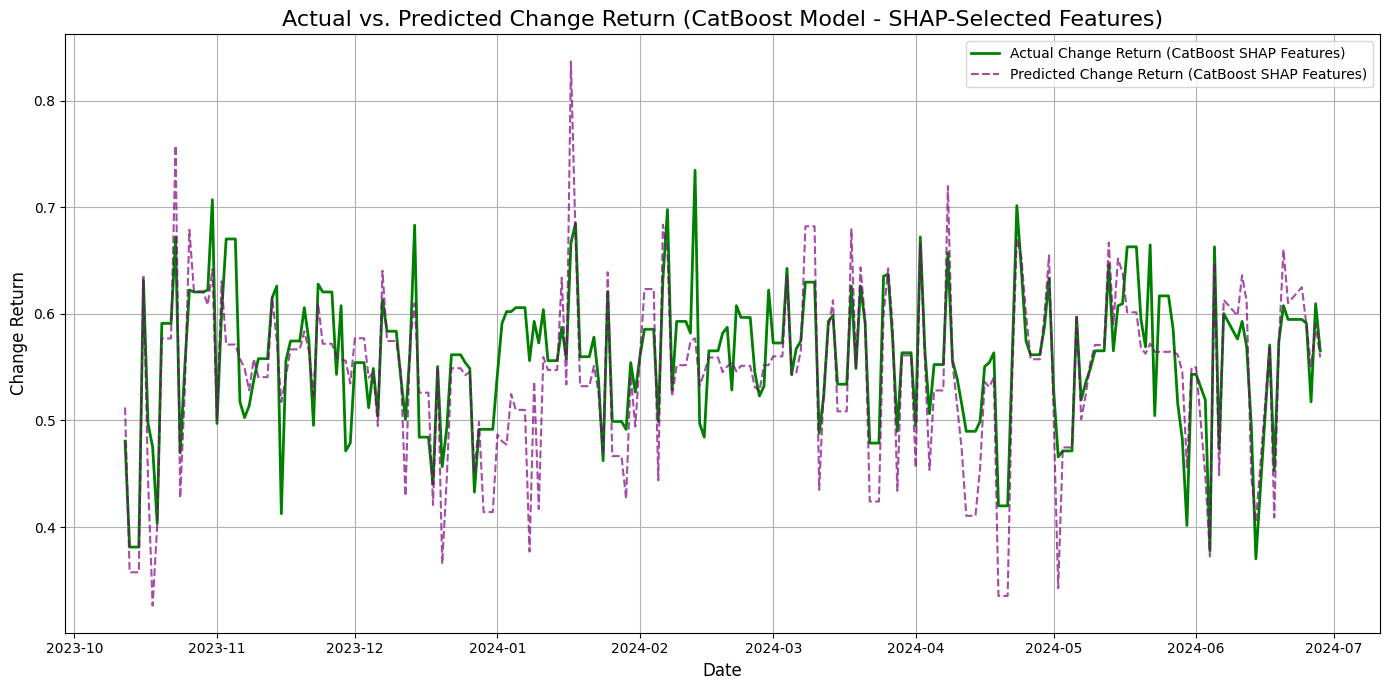

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with a specified size
plt.figure(figsize=(14, 7))

# Plot the actual y_test values
plt.plot(y_test.index, y_test, label='Actual Change Return (CatBoost SHAP Features)', color='green', linewidth=2)

# Plot the preds_catboost_shap values
plt.plot(y_test.index, preds_catboost_shap, label='Predicted Change Return (CatBoost SHAP Features)', color='purple', linestyle='--', alpha=0.7)

# Add a title to the plot
plt.title('Actual vs. Predicted Change Return (CatBoost Model - SHAP-Selected Features)', fontsize=16)

# Label the x-axis and y-axis
plt.xlabel('Date', fontsize=12)
plt.ylabel('Change Return', fontsize=12)

# Display a legend
plt.legend()

# Add a grid for better readability
plt.grid(True)

# Ensure the layout is tight
plt.tight_layout()

# Show the plot
plt.show()